![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [29]:
-- Run this code to save the CSV file as students

SELECT * 
FROM 'students.csv';


,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [30]:
-- Start coding here...

-- Total no of data in the table, split by domestic and international --
SELECT 
  COUNT(*) AS Total_Record,
  (SELECT COUNT(*) FROM students WHERE inter_dom = 'Inter') AS International_Students,
  (SELECT COUNT(*) FROM students WHERE inter_dom = 'Dom') AS Domestic_Students,
  (SELECT COUNT(*) FROM students WHERE inter_dom is NULL) AS No_Status,
FROM students;


,Total_Record,International_Students,Domestic_Students,No_Status
0,286,201,67,18


<function matplotlib.pyplot.show(close=None, block=None)>

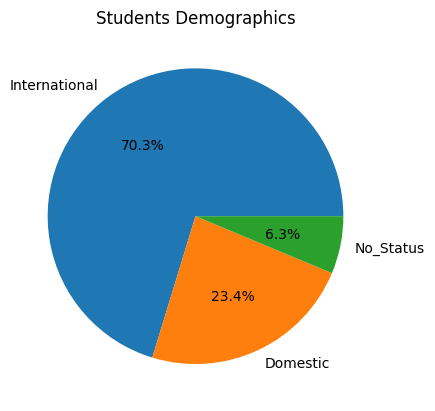

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#DATA
y = np.array([201,67,18])
mylabels = ['International','Domestic','No_Status']
#Pie Chart
fig, ax = plt.subplots()
ax.pie(y, labels = mylabels, autopct ='%.1f%%')
ax.set_title('Students Demographics')
plt.show            

In [32]:
-- Diagnostic test(Phq)--
SELECT 
   inter_dom,
   ROUND(AVG(todep),2) AS Average_phq,
   ROUND(MIN(todep),2) AS Min_phq,
   ROUND(MAX(todep),2) AS Max_phq,
   ROUND(AVG(tosc),2) AS Average_sc,
   ROUND(MIN(tosc),2) AS Min_sc,
   ROUND(MAX(tosc),2) AS Max_sc,
   ROUND(AVG(toas),2) AS Average_as,
   ROUND(MIN(toas),2) AS Min_as,
   ROUND(MAX(toas),2) AS Max_as
From students
GROUP BY inter_dom

,inter_dom,Average_phq,Min_phq,Max_phq,Average_sc,Min_sc,Max_sc,Average_as,Min_as,Max_as
0,Inter,8.04,0.0,25.0,37.42,11.0,48.0,75.56,36.0,145.0
1,Dom,8.61,0.0,23.0,37.64,8.0,48.0,62.84,36.0,112.0
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


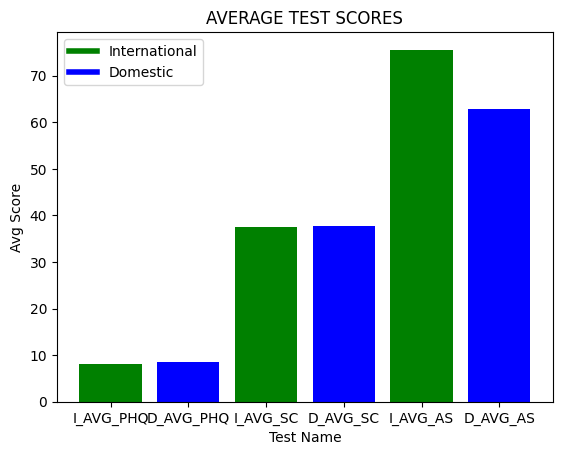

In [33]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

y = np.array([8.04, 8.61, 37.42, 37.64, 75.56, 62.84])
x = ['I_AVG_PHQ', 'D_AVG_PHQ', 'I_AVG_SC', 'D_AVG_SC', 'I_AVG_AS', 'D_AVG_AS']
colors = ['green', 'blue', 'green', 'blue', 'green', 'blue']

bar = plt.bar(x, y, color=colors)
plt.xlabel('Test Name')
plt.ylabel('Avg Score')
plt.title('AVERAGE TEST SCORES')

# Create a custom legend, lw= width of the line, line2D to create object, [0]is jus placeholder
legend_labels = [Line2D([0], [0], color='green', lw=4, label='International'),
                 Line2D([0], [0], color='blue', lw=4, label='Domestic')]

plt.legend(handles=legend_labels, loc='best')
plt.show()


In [34]:
-- Find the average scores by length of stay for international students, and view them in descending order
SELECT stay, 
       ROUND(AVG(todep), 2) AS average_phq, 
       ROUND(AVG(tosc), 2) AS average_scs, 
       ROUND(AVG(toas), 2) AS average_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY stay
ORDER BY stay DESC;

,stay,average_phq,average_scs,average_as
0,10.0,13.00,32.00,50.00
1,8.0,10.00,44.00,65.00
2,7.0,4.00,48.00,45.00
3,6.0,6.00,38.00,58.67
4,5.0,0.00,34.00,91.00
5,4.0,8.57,33.93,87.71
6,3.0,9.09,37.13,78.00
7,2.0,8.28,37.08,77.67
8,1.0,7.48,38.11,72.80


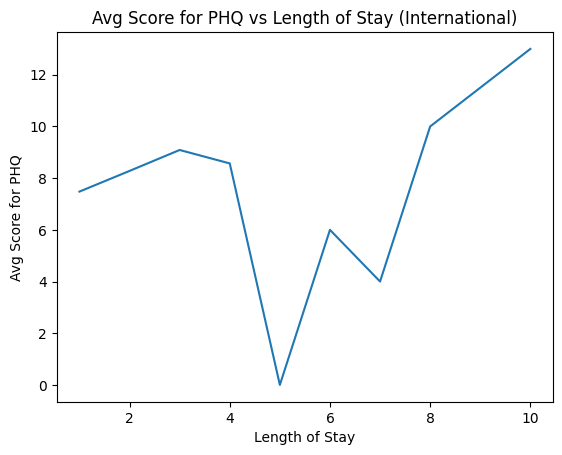

In [35]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
y1 = np.array([7.48, 8.28, 9.09, 8.57, 0, 6,4,10,13])
x = np.array([1,2,3,4,5,6,7,8,10])
plt.plot(x, y1, label = "AVG_PHQ") 
plt.xlabel('Length of Stay')
plt.ylabel('Avg Score for PHQ')
plt.title('Avg Score for PHQ vs Length of Stay (International)')
plt.show()

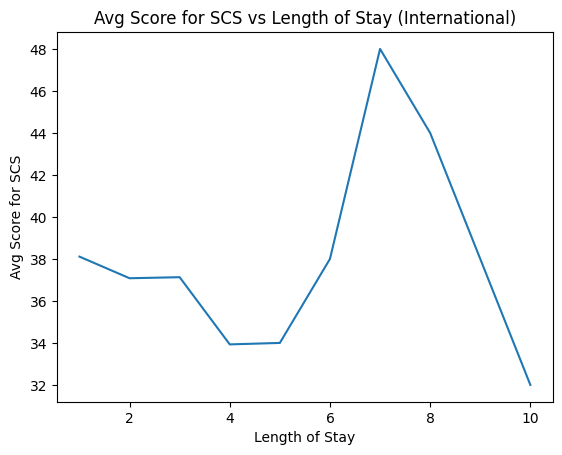

In [36]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
y2 = np.array([38.11,37.08,37.13,33.93,34,38,48,44,32])
x = np.array([1,2,3,4,5,6,7,8,10])
plt.plot(x, y2, label = "AVG_SCS") 
plt.xlabel('Length of Stay')
plt.ylabel('Avg Score for SCS')
plt.title('Avg Score for SCS vs Length of Stay (International)')
plt.show()

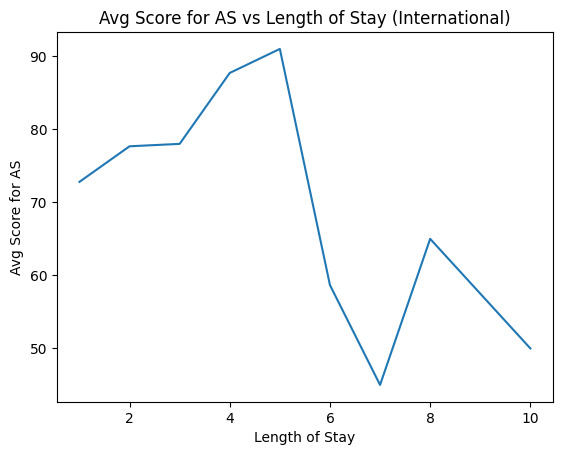

In [37]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
y3 = np.array([72.8,77.67,78,87.71,91,58.67,45,65,50])
x = np.array([1,2,3,4,5,6,7,8,10])
plt.plot(x, y3, label = "AVG_AS") 
plt.xlabel('Length of Stay')
plt.ylabel('Avg Score for AS')
plt.title('Avg Score for AS vs Length of Stay (International)')
plt.show()